In [29]:
import pandas as pd
import re
from DatabaseConnect import *
from underthesea import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

conn = connect()

{'host': 'localhost', 'database': 'phamkimhoang', 'user': 'postgres', 'password': 'postgres'}
Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 15.1 on aarch64-apple-darwin21.6.0, compiled by Apple clang version 14.0.0 (clang-1400.0.29.102), 64-bit',)


In [30]:
# Read data news title from database
sql = "select * from tbnewsresult order by newsdate asc"
df_news_title = pd.read_sql(sql, conn)
df_news_title

,newsdate,title
0,2009-06-01,Giá gas tăng 5.000 đồng/bình 12kg
1,2009-06-01,"VAF đầu tư 9,4 triệu USD vào Masan"
2,2009-06-01,FPT cổ phần hóa các công ty con
3,2009-06-01,PET nhập khẩu lô hàng phân kali đầu tiên
4,2009-06-01,IPO Công ty Vật tư Kỹ thuật Nông nghiệp Bắc N...
...,...,...
48640,2023-02-15,Cổ phiếu than vẫn còn dư địa tăng
48641,2023-02-19,Góc nhìn chuyên gia tuần tới: Cổ phiếu bất độ...
48642,2023-02-22,Chứng khoán châu Á đang bước vào nhịp điều ch...
48643,2023-02-23,Phục hồi thị trường trái phiếu: Ngân hàng sẽ ...


In [31]:
def preprocessData(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # remove special characters
    text = text.replace('&',' ')
    text = text.replace('[^\w\s]',' ')
    text = text.lower()
    text = text.replace('[\s]+',' ')
    text = text.strip()
    return text

with open('stopwords.txt', 'r') as file:
    stopword = file.readlines()

lst_stopwords = []
for wordS in stopword:
    wordS = re.sub(r"[^\w\s]", "", wordS)  # remove special characters
    wordS = wordS.replace('\n','') # remove special characters
    lst_stopwords.append(wordS)

print(lst_stopwords)

def removeStopword(text):
    lst_text = text.split()
    result = []
    for t in lst_text:
        if t not in lst_stopwords:
            result.append(t)
    return ' '.join(result)


df_news_title['title'] = df_news_title['title'].apply(preprocessData)
df_news_title['title'] = df_news_title['title'].apply(removeStopword)

df_news_title


['của', 'đã', 'không', 'khi', 'những', 'nhiều', 'được', 'để', 'từ', 'sắp', 'cho', 'sẽ', 'và', 'vì']


,newsdate,title
0,2009-06-01,giá gas tăng đồngbình kg
1,2009-06-01,vaf đầu tư triệu usd vào masan
2,2009-06-01,fpt cổ phần hóa các công ty con
3,2009-06-01,pet nhập khẩu lô hàng phân kali đầu tiên
4,2009-06-01,ipo công ty vật tư kỹ thuật nông nghiệp bắc ninh
...,...,...
48640,2023-02-15,cổ phiếu than vẫn còn dư địa tăng
48641,2023-02-19,góc nhìn chuyên gia tuần tới cổ phiếu bất động...
48642,2023-02-22,chứng khoán châu á đang bước vào nhịp điều chỉ...
48643,2023-02-23,phục hồi thị trường trái phiếu ngân hàng giữ v...


In [32]:
import unidecode


In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer


In [33]:
from underthesea.corpus.data import Sentence
from underthesea.models.text_classifier import TextClassifier
from underthesea.model_fetcher import ModelFetcher
from underthesea import sentiment



df_news_title['sentiment'] = df_news_title['title'].apply(sentiment)
df_news_title['sentiment'] = df_news_title['sentiment'].fillna('neutral')
df_news_title

,newsdate,title,sentiment
0,2009-06-01,giá gas tăng đồngbình kg,negative
1,2009-06-01,vaf đầu tư triệu usd vào masan,neutral
2,2009-06-01,fpt cổ phần hóa các công ty con,neutral
3,2009-06-01,pet nhập khẩu lô hàng phân kali đầu tiên,neutral
4,2009-06-01,ipo công ty vật tư kỹ thuật nông nghiệp bắc ninh,positive
...,...,...,...
48640,2023-02-15,cổ phiếu than vẫn còn dư địa tăng,neutral
48641,2023-02-19,góc nhìn chuyên gia tuần tới cổ phiếu bất động...,neutral
48642,2023-02-22,chứng khoán châu á đang bước vào nhịp điều chỉ...,neutral
48643,2023-02-23,phục hồi thị trường trái phiếu ngân hàng giữ v...,neutral


In [67]:
df_news_title['sentiment'].value_counts()

neutral     31135
negative    12610
positive     4900
Name: sentiment, dtype: int64

In [37]:
df_vnindex

,tradingdate,close,close7days,label
7,2023-02-10,1055.30,1082.37,1
8,2023-02-09,1064.03,1086.69,1
9,2023-02-08,1072.22,1059.31,0
10,2023-02-07,1065.84,1058.29,0
11,2023-02-06,1089.29,1048.20,0
...,...,...,...,...
5463,2000-08-11,110.36,117.00,1
5464,2000-08-09,108.64,118.84,1
5465,2000-08-07,106.92,118.96,1
5466,2000-08-04,105.20,117.24,1


In [39]:
df_final_2 = df_news_title.merge(df_vnindex, left_on='newsdate', right_on='tradingdate', how='left')
df_final_2.dropna(inplace=True)
df_final_2

,newsdate,title,sentiment,tradingdate,close,close7days,label
0,2009-06-01,giá gas tăng đồngbình kg,negative,2009-06-01,426.43,497.51,1.0
1,2009-06-01,vaf đầu tư triệu usd vào masan,neutral,2009-06-01,426.43,497.51,1.0
2,2009-06-01,fpt cổ phần hóa các công ty con,neutral,2009-06-01,426.43,497.51,1.0
3,2009-06-01,pet nhập khẩu lô hàng phân kali đầu tiên,neutral,2009-06-01,426.43,497.51,1.0
4,2009-06-01,ipo công ty vật tư kỹ thuật nông nghiệp bắc ninh,positive,2009-06-01,426.43,497.51,1.0
...,...,...,...,...,...,...,...
48611,2023-02-10,giao dịch lớn cổ phiếu lpb tdp vtr tvp abb itd...,neutral,2023-02-10,1055.30,1082.37,1.0
48612,2023-02-10,fiingroup invest summit điểm sáng đầu tư,neutral,2023-02-10,1055.30,1082.37,1.0
48613,2023-02-10,phiên khối ngoại tiếp tục mua ròng nhẹ trên ho...,negative,2023-02-10,1055.30,1082.37,1.0
48614,2023-02-10,acbs lên tiếng trước tin đồn về giao dịch cổ p...,neutral,2023-02-10,1055.30,1082.37,1.0


In [57]:
df_sen = df_final_2[['sentiment', 'label']]
df_sen_0 = df_sen[df_sen['sentiment'] == 'negative']
df_sen_1 = df_sen[df_sen['sentiment'] == 'positive']
df_sen_2 = df_sen[df_sen['sentiment'] == 'neutral']

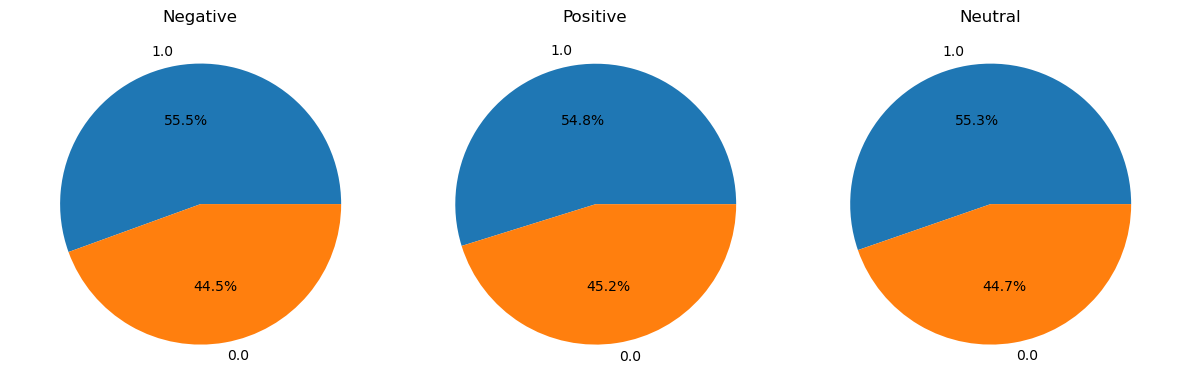

In [66]:

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].pie(df_sen_0['label'].value_counts(), labels=df_sen_0['label'].value_counts().index, autopct='%1.1f%%')
axes[0].axis('equal')
axes[0].set_title('Negative')

# Plot the second chart
axes[1].pie(df_sen_1['label'].value_counts(), labels=df_sen_1['label'].value_counts().index, autopct='%1.1f%%')
axes[1].axis('equal')
axes[1].set_title('Positive')


# Plot the third chart
axes[2].pie(df_sen_2['label'].value_counts(), labels=df_sen_2['label'].value_counts().index, autopct='%1.1f%%')
axes[2].axis('equal')
axes[2].set_title('Neutral')


# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Display the chart
plt.show()

In [34]:
df_news_title['sentiment'].value_counts()

neutral     31135
negative    12610
positive     4900
Name: sentiment, dtype: int64

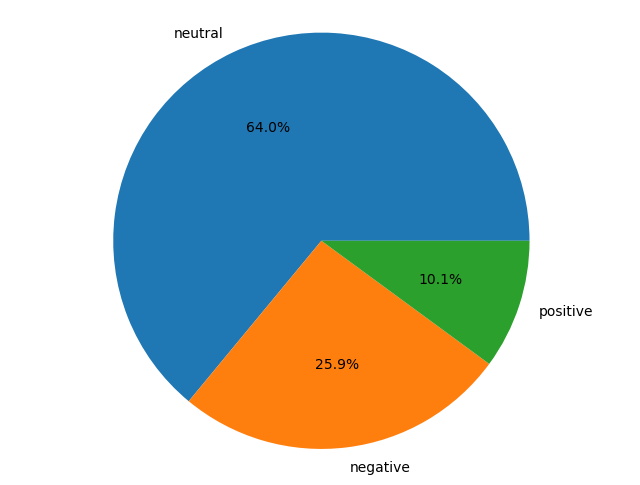

In [36]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.pie(df_news_title['sentiment'].value_counts(), labels=df_news_title['sentiment'].value_counts().index, autopct='%1.1f%%')
plt.title('')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(df_news_title['sentiment'].value_counts(), labels=df_news_title['sentiment'].value_counts().index, autopct='%1.1f%%')
plt.title('')
plt.axis('equal')

# Display the chart
plt.show()


In [83]:
df_neg = df_news_title[df_news_title['sentiment'] == 'negative']
df_pos = df_news_title[df_news_title['sentiment'] == 'positive']
df_pos

,newsdate,title,sentiment
4,2009-06-01,ipo công ty vật tư kỹ thuật nông nghiệp bắc ninh,positive
12,2009-06-01,otc mua đón đầu,positive
15,2009-06-01,hpt doanh thu quý i tăng,positive
25,2009-06-02,trào lưu niêm yết mới,positive
28,2009-06-02,mở rộng diện xét kiểm soát đặc biệt đối với tctd,positive
...,...,...,...
48537,2023-02-04,ssi research còn quá sớm quá lạc quan về khả n...,positive
48542,2023-02-05,bigtrends giữ tiền chờ cơ hội,positive
48567,2023-02-07,dòng tiền thông minh nđt cá nhân bán ròng hơn ...,positive
48571,2023-02-07,vnindex trở lại phải năm phiêu lưu,positive


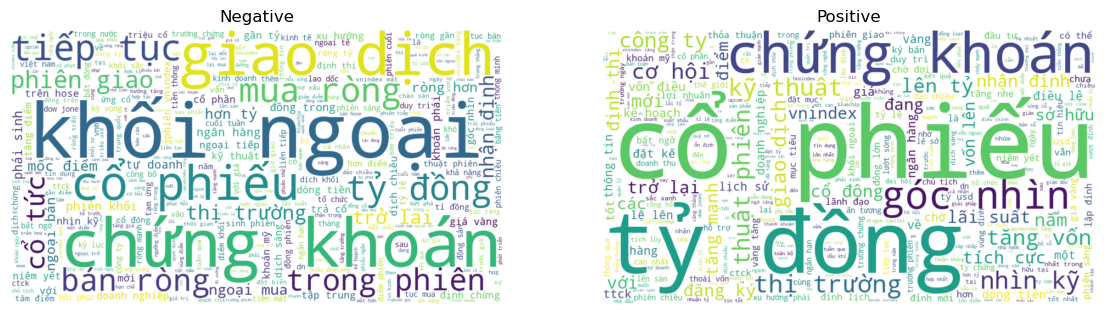

In [84]:
text = ' '.join(df_neg['title'].tolist())
wordcloud = WordCloud(width=900, height=500, max_words=300, background_color="white").generate(text)

text2 = ' '.join(df_pos['title'].tolist())
wordcloud2 = WordCloud(width=900, height=500, max_words=300, background_color="white").generate(text2)

# # Showup wordcloud
# fig = plt.figure(figsize=(15, 12), facecolor='k')
# plt.subplot(1, 2, 1)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title('WordCloud các giá trị được gán nhãn 0')

# plt.subplot(1, 2, 2)
# plt.imshow(wordcloud2, interpolation='bilinear')
# plt.axis("off")
# plt.title('WordCloud các giá trị được gán nhãn 1')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].set_title('Negative')
axes[0].axis('off')

# Plot the second chart
axes[1].imshow(wordcloud2, interpolation='bilinear')
axes[1].set_title('Positive')
axes[1].axis('off')


plt.show()

In [11]:
df_news_title['sentiment'].value_counts()

neutral     31135
negative    12610
positive     4900
Name: sentiment, dtype: int64

In [12]:
df_news_title = df_news_title.groupby('newsdate', as_index=False).agg(list)
df_news_title['title'] = df_news_title['title'].apply(lambda x:' '.join(x))


In [13]:
frequent = 7
sql_vnindex = 'select t.tradingdate, t.close close from tbvnindex t order by tradingdate desc'
df_vnindex = pd.read_sql_query(sql_vnindex, conn)
df_vnindex['close7days'] = df_vnindex['close'].shift(frequent)
df_vnindex.head(10)
df_vnindex['label'] = np.where(df_vnindex['close7days'] > df_vnindex['close'], 1, 0)
df_vnindex.head(10)

,tradingdate,close,close7days,label
0,2023-02-21,1082.37,NaN,0
1,2023-02-20,1086.69,NaN,0
2,2023-02-17,1059.31,NaN,0
3,2023-02-16,1058.29,NaN,0
4,2023-02-15,1048.20,NaN,0
5,2023-02-14,1038.64,NaN,0
6,2023-02-13,1043.70,NaN,0
7,2023-02-10,1055.30,1082.37,1
8,2023-02-09,1064.03,1086.69,1
9,2023-02-08,1072.22,1059.31,0


In [14]:
df_vnindex.dropna(inplace=True)
df_vnindex['label'].value_counts()

1    2979
0    2482
Name: label, dtype: int64

In [15]:
df_news_title['newsdate'] = pd.to_datetime(df_news_title['newsdate'])
df_final = df_news_title.merge(df_vnindex, left_on='newsdate', right_on='tradingdate', how='left')
df_final

,newsdate,title,sentiment,tradingdate,close,close7days,label
0,2009-06-01,giá gas tăng đồngbình kg đảo nợ một vấn đề các...,"[negative, negative, neutral, neutral, neutral...",2009-06-01,426.43,497.51,1.0
1,2009-06-02,lãi suất huy động usd giảm sâu trào lưu niêm y...,"[neutral, positive, neutral, neutral, positive...",2009-06-02,440.56,511.27,1.0
2,2009-06-03,vàng sơ chế ở nước ngoài phép chuyển về việt n...,"[negative, neutral, neutral, neutral, positive...",2009-06-03,444.79,509.59,1.0
3,2009-06-04,doanh nghiệp vừa nhỏ vẫn nơm nớp lo tỷ giá niê...,"[neutral, neutral, neutral, negative, neutral,...",2009-06-04,458.19,493.52,1.0
4,2009-06-05,khát nhân sự ngành chứng khoán lợi nhuận ngân ...,"[neutral, neutral, neutral, negative, negative...",2009-06-05,478.72,471.97,0.0
...,...,...,...,...,...,...,...
4640,2023-02-15,cổ phiếu than vẫn còn dư địa tăng,[neutral],NaT,NaN,NaN,NaN
4641,2023-02-19,góc nhìn chuyên gia tuần tới cổ phiếu bất động...,[neutral],NaT,NaN,NaN,NaN
4642,2023-02-22,chứng khoán châu á đang bước vào nhịp điều chỉ...,[neutral],NaT,NaN,NaN,NaN
4643,2023-02-23,phục hồi thị trường trái phiếu ngân hàng giữ v...,[neutral],NaT,NaN,NaN,NaN


In [80]:
df_final

,newsdate,title,sentiment,tradingdate,close,close7days,label
0,2009-06-01,giá gas tăng đồngbình kg đảo nợ một vấn đề các...,"[negative, negative, neutral, neutral, neutral...",2009-06-01,426.43,497.51,1.0
1,2009-06-02,lãi suất huy động usd giảm sâu trào lưu niêm y...,"[neutral, positive, neutral, neutral, positive...",2009-06-02,440.56,511.27,1.0
2,2009-06-03,vàng sơ chế ở nước ngoài phép chuyển về việt n...,"[negative, neutral, neutral, neutral, positive...",2009-06-03,444.79,509.59,1.0
3,2009-06-04,doanh nghiệp vừa nhỏ vẫn nơm nớp lo tỷ giá niê...,"[neutral, neutral, neutral, negative, neutral,...",2009-06-04,458.19,493.52,1.0
4,2009-06-05,khát nhân sự ngành chứng khoán lợi nhuận ngân ...,"[neutral, neutral, neutral, negative, negative...",2009-06-05,478.72,471.97,0.0
...,...,...,...,...,...,...,...
4640,2023-02-15,cổ phiếu than vẫn còn dư địa tăng,[neutral],NaT,NaN,NaN,NaN
4641,2023-02-19,góc nhìn chuyên gia tuần tới cổ phiếu bất động...,[neutral],NaT,NaN,NaN,NaN
4642,2023-02-22,chứng khoán châu á đang bước vào nhịp điều chỉ...,[neutral],NaT,NaN,NaN,NaN
4643,2023-02-23,phục hồi thị trường trái phiếu ngân hàng giữ v...,[neutral],NaT,NaN,NaN,NaN


In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4645 entries, 0 to 4644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   newsdate     4645 non-null   datetime64[ns]
 1   title        4645 non-null   object        
 2   sentiment    4645 non-null   object        
 3   tradingdate  3372 non-null   datetime64[ns]
 4   close        3372 non-null   float64       
 5   close7days   3372 non-null   float64       
 6   label        3372 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 290.3+ KB


In [79]:
for i, row in df_final.iterrows():
    if pd.isna(row['close']):
        # if close value is NaN, continue searching for next non-null newsdate value
        j = i + 1
        while j < len(df_final.index) and pd.isna(df_final.loc[j, 'close']):
            j += 1
        if j < len(df_final.index):
            df_final.loc[i, 'newsdate'] = df_final.loc[j, 'newsdate']
    else:
        # if close value is not NaN, use current row's value
        df_final.loc[i, 'newsdate'] = row['newsdate']

# df_final2 = df_final[['newsdate', 'title']].groupby('newsdate', as_index=False).agg(list)
df_final2['title'] = df_final['title'].apply(lambda x:' '.join(x))
df_final2

,newsdate,title
0,2009-06-01,g i á g a s t ă n g đ ồ n g b ì n h k ...
1,2009-06-02,l ã i s u ấ t h u y đ ộ n g u s d g ...
2,2009-06-03,v à n g s ơ c h ế ở n ư ớ c n g o à ...
3,2009-06-04,d o a n h n g h i ệ p v ừ a n h ỏ v ẫ ...
4,2009-06-05,k h á t n h â n s ự n g à n h c h ứ n ...
...,...,...
3376,2023-02-15,n h ậ n đ ị n h t h ị t r ư ờ n g c h ...
3377,2023-02-19,k h ố i n g o ạ i b á n b ộ c ổ p h ...
3378,2023-02-22,b ả n t i n c h ứ n g k h o á n d o a ...
3379,2023-02-23,b ả n t i n c h ứ n g k h o á n d o a ...


In [18]:
df_final2['title_tokenized'] = df_final2['title'].apply(word_tokenize)
# df_final2['title_tokenized'] = df_final2['title']
df_final2['newsdate'] = pd.to_datetime(df_final2['newsdate'])
df_final3 = df_final2.merge(df_vnindex, left_on='newsdate', right_on='tradingdate', how='left')

df_final3

,newsdate,title,title_tokenized,tradingdate,close,close7days,label
0,2009-06-01,giá gas tăng đồngbình kg đảo nợ một vấn đề các...,"[giá, gas, tăng, đồngbình, kg, đảo, nợ, một, v...",2009-06-01,426.43,497.51,1.0
1,2009-06-02,lãi suất huy động usd giảm sâu trào lưu niêm y...,"[lãi, suất, huy, động, usd, giảm, sâu, trào, l...",2009-06-02,440.56,511.27,1.0
2,2009-06-03,vàng sơ chế ở nước ngoài phép chuyển về việt n...,"[vàng, sơ, chế, ở, nước, ngoài, phép, chuyển, ...",2009-06-03,444.79,509.59,1.0
3,2009-06-04,doanh nghiệp vừa nhỏ vẫn nơm nớp lo tỷ giá niê...,"[doanh, nghiệp, vừa, nhỏ, vẫn, nơm, nớp, lo, t...",2009-06-04,458.19,493.52,1.0
4,2009-06-05,khát nhân sự ngành chứng khoán lợi nhuận ngân ...,"[khát, nhân, sự, ngành, chứng, khoán, lợi, nhu...",2009-06-05,478.72,471.97,0.0
...,...,...,...,...,...,...,...
3376,2023-02-15,cổ phiếu than vẫn còn dư địa tăng,"[cổ, phiếu, than, vẫn, còn, dư, địa, tăng]",NaT,NaN,NaN,NaN
3377,2023-02-19,góc nhìn chuyên gia tuần tới cổ phiếu bất động...,"[góc, nhìn, chuyên, gia, tuần, tới, cổ, phiếu,...",NaT,NaN,NaN,NaN
3378,2023-02-22,chứng khoán châu á đang bước vào nhịp điều chỉ...,"[chứng, khoán, châu, á, đang, bước, vào, nhịp,...",NaT,NaN,NaN,NaN
3379,2023-02-23,phục hồi thị trường trái phiếu ngân hàng giữ v...,"[phục, hồi, thị, trường, trái, phiếu, ngân, hà...",NaT,NaN,NaN,NaN


In [19]:
df_model = df_final3[['newsdate', 'title_tokenized', 'label']]
df_model['frequent'] = frequent
df_model.dropna(inplace=True)
df_model


,newsdate,title_tokenized,label,frequent
0,2009-06-01,"[giá, gas, tăng, đồngbình, kg, đảo, nợ, một, v...",1.0,7
1,2009-06-02,"[lãi, suất, huy, động, usd, giảm, sâu, trào, l...",1.0,7
2,2009-06-03,"[vàng, sơ, chế, ở, nước, ngoài, phép, chuyển, ...",1.0,7
3,2009-06-04,"[doanh, nghiệp, vừa, nhỏ, vẫn, nơm, nớp, lo, t...",1.0,7
4,2009-06-05,"[khát, nhân, sự, ngành, chứng, khoán, lợi, nhu...",0.0,7
...,...,...,...,...
3367,2023-02-06,"[cổ, phiếu, ngân, hàng, tuần, đầu, năm, quý, m...",0.0,7
3368,2023-02-07,"[vnindex, trở, lại, phải, năm, phiêu, lưu, thị...",0.0,7
3369,2023-02-08,"[agriseco, định, giá, pe, ngang, với, thời, đi...",0.0,7
3370,2023-02-09,"[giao, dịch, lớn, cổ, phiếu, htr, kdc, fid, oc...",1.0,7


In [20]:
# remove stop word
with open('stopwords.txt', 'r') as file:
    stopword = file.readlines()

lst_stopwords = []
for wordS in stopword:
    wordS = re.sub(r"[^\w\s]", "", wordS)  # remove special characters
    wordS = wordS.replace('\n','') # remove special characters
    lst_stopwords.append(wordS)

print(lst_stopwords)

def removeStopword(lst_text):
    result = []
    for t in lst_text:
        if t not in lst_stopwords:
            result.append(t)
    return ' '.join(result)


df_model['title_tokenized'] = df_model['title_tokenized'].apply(removeStopword)


['của', 'đã', 'không', 'khi', 'những', 'nhiều', 'được', 'để', 'từ', 'sắp', 'cho', 'sẽ', 'và', 'vì']


In [21]:
df_model

,newsdate,title_tokenized,label,frequent
0,2009-06-01,giá gas tăng đồngbình kg đảo nợ một vấn đề các...,1.0,7
1,2009-06-02,lãi suất huy động usd giảm sâu trào lưu niêm y...,1.0,7
2,2009-06-03,vàng sơ chế ở nước ngoài phép chuyển về việt n...,1.0,7
3,2009-06-04,doanh nghiệp vừa nhỏ vẫn nơm nớp lo tỷ giá niê...,1.0,7
4,2009-06-05,khát nhân sự ngành chứng khoán lợi nhuận ngân ...,0.0,7
...,...,...,...,...
3367,2023-02-06,cổ phiếu ngân hàng tuần đầu năm quý mão mã giả...,0.0,7
3368,2023-02-07,vnindex trở lại phải năm phiêu lưu thị trường ...,0.0,7
3369,2023-02-08,agriseco định giá pe ngang với thời điểm covid...,0.0,7
3370,2023-02-09,giao dịch lớn cổ phiếu htr kdc fid ocb psc btn...,1.0,7


In [22]:
df_model_1 = df_model[df_model['label'] == 1]
df_model_0 = df_model[df_model['label'] == 0]

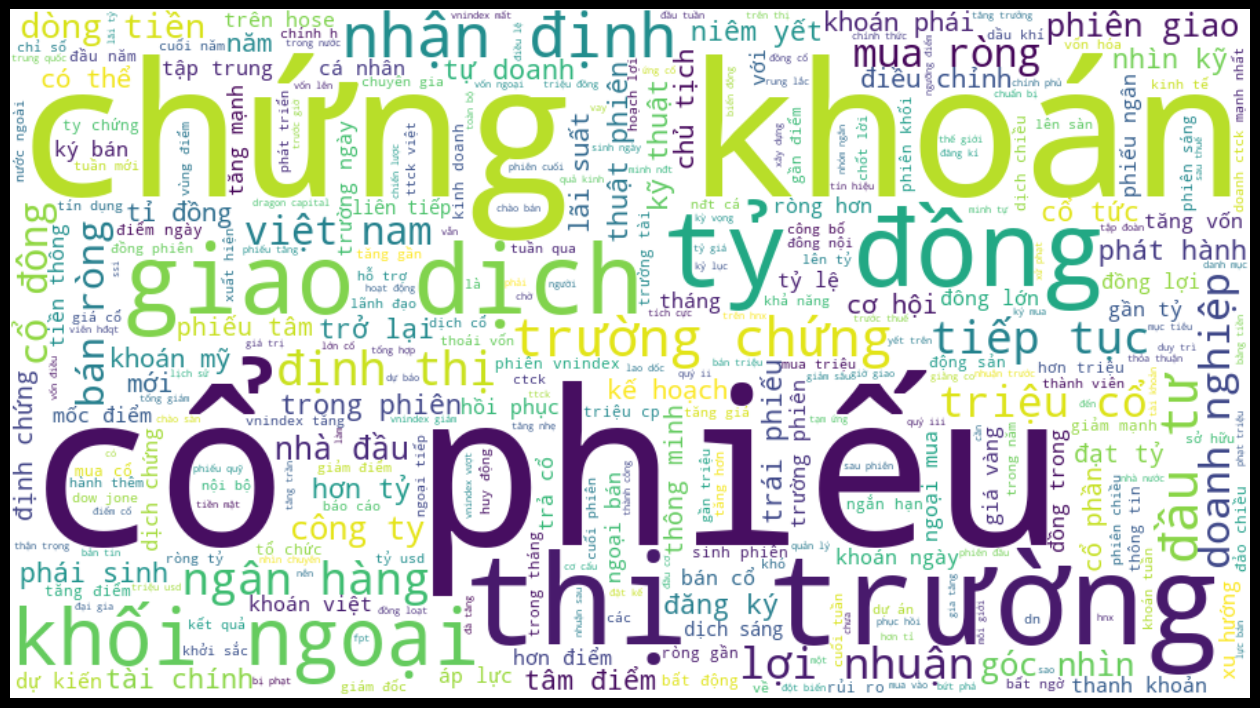

In [23]:
# create wordcloud from string
# df_model['title_tokenized'] = df_model['title_tokenized'].apply(lambda x:' '.join(x))
text = ' '.join(df_model['title_tokenized'].tolist())
wordcloud = WordCloud(width=900, height=500, max_words=300, background_color="white").generate(text)

# Showup wordcloud
fig = plt.figure(figsize=(16, 14), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

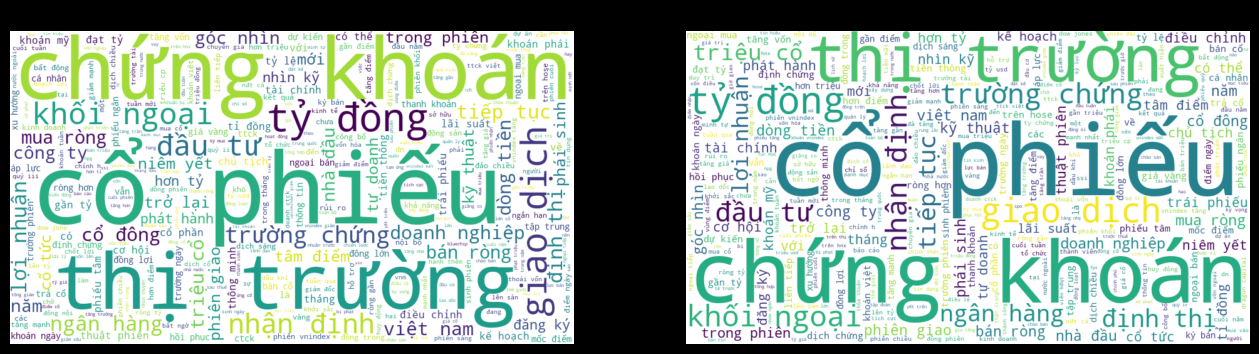

In [24]:
text = ' '.join(df_model_0['title_tokenized'].tolist())
wordcloud = WordCloud(width=900, height=500, max_words=300, background_color="white").generate(text)

text2 = ' '.join(df_model_1['title_tokenized'].tolist())
wordcloud2 = WordCloud(width=900, height=500, max_words=300, background_color="white").generate(text2)

# Showup wordcloud
fig = plt.figure(figsize=(16, 14), facecolor='k')
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud các giá trị được gán nhãn 0')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud các giá trị được gán nhãn 1')


plt.show()

In [25]:
df_model['label'].value_counts()

1.0    1919
0.0    1453
Name: label, dtype: int64

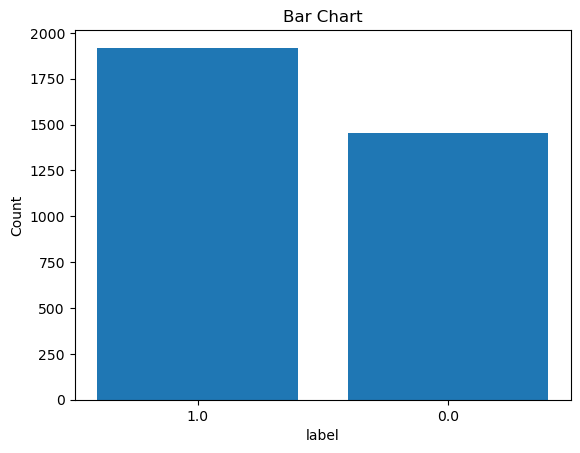

In [26]:
df_label = pd.DataFrame(df_model['label'].value_counts())
df_label.index = df_label.index.astype(str)

plt.bar(df_label.index, df_label['label'])
plt.xlabel('label')
plt.ylabel('Count')
plt.title('Bar Chart')

plt.show()

In [27]:
sql_delete = 'DELETE FROM tbdatamodel where frequent = ' + str(frequent)
create_query(conn, sql_delete)
execute_values(conn, df_model, "tbdatamodel", 'INSERT')

The query has been run
The dataframe tbdatamodel is inserted
